### About

The data provided by STEG is composed of two files. The first one is comprised of client data and the second one contains billing history from 2005 to 2019.

There are 2 .zip files for download, train.zip, and test.zip and a SampleSubmission.csv. In each .zip file you will find a client and invoice file.

Variable definitions

#### Client:

    Client_id: Unique id for client
    District: District where the client is
    Client_catg: Category client belongs to
    Region: Area where the client is
    Creation_date: Date client joined
    Target: fraud:1 , not fraud: 0

#### Invoice data

    Client_id: Unique id for the client
    Invoice_date: Date of the invoice
    Tarif_type: Type of tax
    Counter_number:
    Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
    Counter_code:
    Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
    Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
    Consommation_level_1: Consumption_level_1
    Consommation_level_2: Consumption_level_2
    Consommation_level_3: Consumption_level_3
    Consommation_level_4: Consumption_level_4
    Old_index: Old index
    New_index: New index
    Months_number: Month number
    Counter_type: Type of counter


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import lightgbm
#from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter('ignore')

In [2]:
client_train = pd.read_csv('data/train/client_train.csv', low_memory=False)
invoice_train = pd.read_csv('data/train/invoice_train.csv', low_memory=False)

In [3]:
#compare size of the various datasets
print(client_train.shape, invoice_train.shape)

(135493, 6) (4476749, 16)


In [4]:
invoice_train.head(15)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


In [16]:
invoice_train.sort_values(['client_id','invoice_date'])

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
22,train_Client_0,2005-10-17,11,1335667,0,203,6,1,124,0,0,0,3685,3809,4,ELEC
23,train_Client_0,2006-02-24,11,1335667,0,203,6,1,141,0,0,0,3809,3950,4,ELEC
24,train_Client_0,2006-06-23,11,1335667,0,203,6,1,162,0,0,0,3950,4112,4,ELEC
25,train_Client_0,2006-10-18,11,1335667,0,203,6,1,159,0,0,0,4112,4271,4,ELEC
28,train_Client_0,2007-02-26,11,1335667,0,203,6,1,182,0,0,0,4271,4453,4,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476748,train_Client_99999,1996-01-25,11,560948,0,203,6,1,516,0,0,0,12765,13281,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC


We can see there are many entries for each client

In [5]:
client_train.head(15)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
5,69,train_Client_10000,11,103,29/09/1993,0.0
6,62,train_Client_100000,11,309,07/06/2012,0.0
7,60,train_Client_100001,11,101,12/04/2006,0.0
8,62,train_Client_100002,11,301,31/12/2006,0.0
9,60,train_Client_100003,11,101,25/10/2011,0.0


In [6]:
#check for missing values
invoice_train.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [7]:
#check for missing values
client_train.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [11]:
invoices_grouped = invoice_train.groupby('client_id')

invoices_grouped.mean()

TypeError: Could not convert 2014-03-242013-03-292015-03-232015-07-132016-11-172017-07-172018-12-072019-03-192011-07-222011-11-222008-11-252012-07-232012-11-292013-07-222014-07-182014-11-242015-11-182012-03-272011-03-302013-02-122010-07-222010-11-242005-10-172006-02-242006-06-232006-10-182007-06-272007-10-252007-02-262008-07-282009-01-042009-07-272009-11-242010-03-292008-01-04 to numeric

In [15]:
pd.pivot_table(invoice_train.drop('invoice_date', axis=1),index='client_id')

TypeError: Could not convert 000A00000A00AAA0000A000A000000000000000A00AAAA00A0000 to numeric

In [13]:
invoice_train.invoice_date = pd.to_datetime(invoice_train.invoice_date)

In [17]:
invoice_train.value_counts('counter_statue')

counter_statue
0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: count, dtype: int64

In [18]:
invoice_train.reading_remarque.value_counts()

reading_remarque
6      2230939
9      1416992
8       828123
7          661
203         15
413         12
207          6
5            1
Name: count, dtype: int64

In [20]:
# define average monthly change 

invoice_train.eval('avg_month_use = (new_index - old_index) / months_number ', inplace=True)

In [21]:
invoice_train.avg_month_use.describe()

count    4.476747e+06
mean     1.578431e+02
std      2.234450e+03
min     -9.985390e+05
25%      1.975000e+01
50%      7.640000e+01
75%      1.575000e+02
max      2.744730e+05
Name: avg_month_use, dtype: float64

In [51]:
invoice_train.avg_month_use.value_counts()

avg_month_use
 0.000000        472681
 0.250000         18967
 0.500000         16268
 1.000000         11557
 1.500000          9625
                  ...  
 244.200000           1
 1578.400000          1
-24130.500000         1
 155.300000           1
 158.769231           1
Name: count, Length: 46122, dtype: int64

(-0.11000000000000001, 0.11000000000000001)

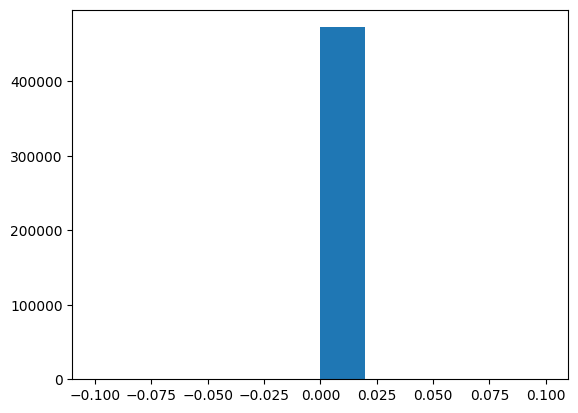

In [49]:
fig, ax = plt.subplots()

plt.hist(invoice_train.avg_month_use, range=(-0.1,0.1) )
ax.set_xlim()

In [26]:
import numpy as np

ValueError: supplied range of [-inf, 5.438499629195089] is not finite

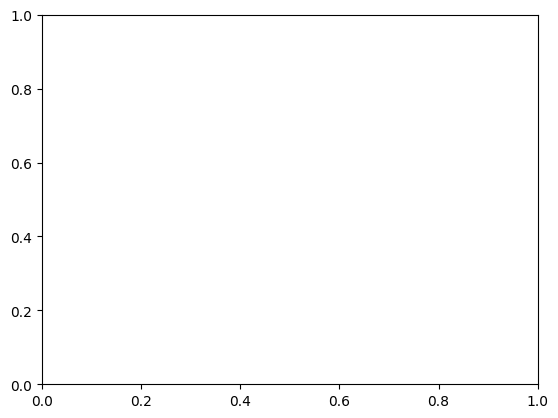

In [27]:
plt.hist(np.log10(invoice_train.avg_month_use))

In [28]:
invoice_train['avg_use_log'] = np.log10(invoice_train.avg_month_use)

(array([3.930000e+02, 3.786500e+04, 8.844200e+04, 3.695960e+05,
        1.307290e+06, 1.907566e+06, 2.437490e+05, 4.452800e+04,
        2.322000e+03, 5.100000e+01]),
 array([-1.64345268, -0.93525745, -0.22706222,  0.48113302,  1.18932825,
         1.89752348,  2.60571871,  3.31391394,  4.02210917,  4.7303044 ,
         5.43849963]),
 <BarContainer object of 10 artists>)

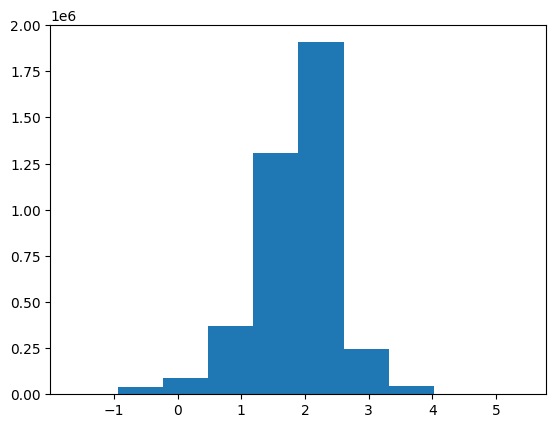

In [43]:
plt.hist(invoice_train.avg_use_log)

In [38]:
invoice_train.query('avg_use_log < 1')

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,avg_month_use,avg_use_log
90,train_Client_100,2009-10-22,11,2078,0,413,6,1,0,0,0,0,98,98,4,ELEC,0.00,-inf
91,train_Client_100,2006-10-10,11,2078,0,413,6,1,0,0,0,0,90,90,4,ELEC,0.00,-inf
92,train_Client_100,2007-02-15,11,2078,0,413,6,1,1,0,0,0,90,91,4,ELEC,0.25,-0.602060
93,train_Client_100,2007-06-18,11,2078,0,413,6,1,0,0,0,0,91,91,4,ELEC,0.00,-inf
94,train_Client_100,2008-06-19,11,2078,0,413,6,1,0,0,0,0,91,91,4,ELEC,0.00,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476682,train_Client_99996,2013-02-22,40,0,1,5,6,1,0,0,0,0,0,0,4,GAZ,0.00,-inf
4476706,train_Client_99996,2016-10-18,40,4811719,0,5,9,1,36,0,0,0,374,410,4,GAZ,9.00,0.954243
4476711,train_Client_99997,2015-08-10,40,0,0,5,9,1,36,0,0,0,760,796,4,GAZ,9.00,0.954243
4476719,train_Client_99997,2014-10-17,40,0,0,5,9,1,33,0,0,0,590,623,4,GAZ,8.25,0.916454


In [36]:
invoice_train.head(10)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,avg_month_use,avg_use_log
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,20.500000,1.311754
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,346.000000,2.539076
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,30.750000,1.487845
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC,25.500000,1.406540
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC,47.666667,1.678215
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC,39.250000,1.593840
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC,45.083333,1.654016
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC,73.125000,1.864066
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC,346.500000,2.539703
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC,270.500000,2.432167


In [39]:
invoice_train.shape

(4476749, 18)

In [42]:
invoice_train.avg_use_log.replace(to_replace=[np.inf, -np.inf], value=np.nan, inplace=True)

In [54]:
invoice_train.avg_use_log.isnull().sum()

474947

In [57]:
invoice_train.query('avg_month_use == 0').shape

(472681, 18)

In [59]:
invoice_train.query('avg_month_use < 10').shape[0] / len(invoice_train.avg_month_use) * 100

17.684730593562424

In [64]:
invoice_train.query('avg_month_use < 0').client_id.nunique()

1120       train_Client_100024
2818        train_Client_10008
5257       train_Client_100144
5751       train_Client_100157
9097       train_Client_100257
                  ...         
4458606     train_Client_99506
4461423     train_Client_99580
4461805      train_Client_9959
4466699     train_Client_99733
4476318     train_Client_99985
Name: client_id, Length: 2264, dtype: object

In [73]:
list_of_suspects = invoice_train.query('avg_month_use < 1').client_id.unique().tolist()

client_train.query(f'client_id in {list_of_suspects}').target.value_counts()

target
0.0    72982
1.0     5495
Name: count, dtype: int64

In [70]:
5495 / 7566 * 100

72.6275442770288